# Classificação Open Set

In [118]:
# Carregar dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=5, n_samples=1000, n_features=5, n_clusters_per_class=1, n_informative=3)
#y = [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 4, 5, 6, 4, 5, 6, 4, 5, 6] *3
#X = np.random.random((len(y), 5))

In [119]:
import pandas as pd
df1 = pd.read_csv('audio_features.csv')[['local filename', 'features']].set_index('local filename')
df1.head()

,features
local filename,
dusky-legged_guan-xc495598-peneloperoostpnitatiaia2ndnight.mp3,[ 1.3306442e+02 -5.6147091e+01 3.1085775e+01 ...
dusky-legged_guan-xc495593-penelopeobsroostnight1pnitatia2000.mp3,[ 9.31848221e+01 8.18554878e+00 -2.12469995e-...
dusky-legged_guan-xc418780-ste-020%20jacua%c3%a7u%20xc.mp3,[ 7.18602448e+01 1.85158622e+00 1.58647146e+...
dusky-legged_guan-xc389186-a141021_03_penelope_21out_5e31.mp3,[ 3.2591091e+01 -2.0705858e+01 2.0498142e+01 ...
dusky-legged_guan-xc352172-ste-011%20jacua%c3%a7u.mp3,[ 9.2351166e+01 -5.1915062e+01 -7.1535009e-01 ...


In [120]:
df2 = pd.read_csv('xenocanto_brazil_birds_dataset_2022_march.csv')[['local filename', 'common name']].set_index('local filename')
df2.head()

,common name
local filename,
dusky-legged_guan-xc495598-peneloperoostpnitatiaia2ndnight.mp3,Dusky-legged Guan
dusky-legged_guan-xc495593-penelopeobsroostnight1pnitatia2000.mp3,Dusky-legged Guan
dusky-legged_guan-xc418780-ste-020%20jacua%c3%a7u%20xc.mp3,Dusky-legged Guan
dusky-legged_guan-xc389186-a141021_03_penelope_21out_5e31.mp3,Dusky-legged Guan
dusky-legged_guan-xc352172-ste-011%20jacua%c3%a7u.mp3,Dusky-legged Guan


In [121]:
df = df1.join(df2)
df.head()

,features,common name
local filename,,
black-capped_foliage-gleaner-%20coroado%20-%20paranagu%c3%81%20-%2024-06-11.mp3,[ 1.9828814e+01 -3.0474409e+01 1.1111216e+01 ...,Black-capped Foliage-gleaner
black-capped_foliage-gleaner-%28black-capped%20foliage-gleaner%29.e.p.09.07.mp3,[ 6.6125198e+01 -1.6387081e+01 3.0759731e+01 ...,Black-capped Foliage-gleaner
black-capped_foliage-gleaner-%28black-capped_foliage-gleaner%29e.p.26.12.08.mp3,[ 4.4650520e+01 -3.8927006e+01 7.5882325e+00 ...,Black-capped Foliage-gleaner
black-capped_foliage-gleaner-%28calls%29estveracel_sccabralia_ba_220815_fig.mp3,[ 3.6323315e+01 -1.5638915e+01 2.3351820e+01 ...,Black-capped Foliage-gleaner
black-capped_foliage-gleaner-0832-philydor_atricapillus_campeche_05_08_2014.mp3,[ 9.52734756e+01 1.53192215e+01 3.10814362e+...,Black-capped Foliage-gleaner


In [122]:
df['common name'] = pd.Categorical(df['common name'])
df['code'] = df['common name'].cat.codes


In [123]:
import numpy as np
y = np.array([l for l in list(df['code'])])
#print(y.shape)
#y.shape=(-1,1)
#print(y.shape)

In [124]:
import re
import numpy as np
from sklearn.preprocessing import normalize
x = [ [float(e) for e in re.split(r"[\[\]\s]+", line)[1:-1]] for line in df['features']]
X = np.array(x)
X = np.hstack( (X[:,0:22], X[:,33:44], X[:,55:66]) )
X = normalize(X)
print(X.shape)

(6113, 44)


In [125]:
# Dividir o dataset em classes conhecidas e desconhecidas
# y tem meu set
import random
import numpy as np

classes = list(set(y))

random.shuffle(classes)
p_unknown = 0.95
n_max = int(len(classes) * p_unknown)
classes_unk = classes[0:n_max]
classes_k = classes[n_max:]
print(classes_unk, classes_k)
idx_unk = [i for i in range(len(y)) if y[i] in classes_unk]
idx_k = [i for i in range(len(y)) if y[i] in classes_k]
#print(idx_unk, idx_k)
#print(y[idx_unk], y[idx_k])

[62, 21, 83, 24, 42, 38, 30, 92, 61, 19, 34, 22, 32, 69, 27, 43, 66, 45, 82, 50, 60, 13, 55, 51, 58, 17, 25, 67, 31, 33, 71, 40, 54, 15, 18, 56, 70, 12, 59, 35, 26, 29, 47, 80, 49, 41, 9, 84, 90, 65, 36, 57, 91, 46, 87, 5, 64, 68, 52, 16, 8, 3, 1, 86, 74, 37, 76, 10, 2, 88, 72, 85, 6, 53, 0, 7, 78, 44, 11, 77, 79, 48, 14, 63, 4, 89, 81, 23] [20, 75, 39, 73, 28]


In [126]:
# Dividir conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[idx_k,:], y[idx_k], test_size=0.33, random_state=42)


In [127]:
print(set(y[idx_k]))

{39, 73, 75, 20, 28}


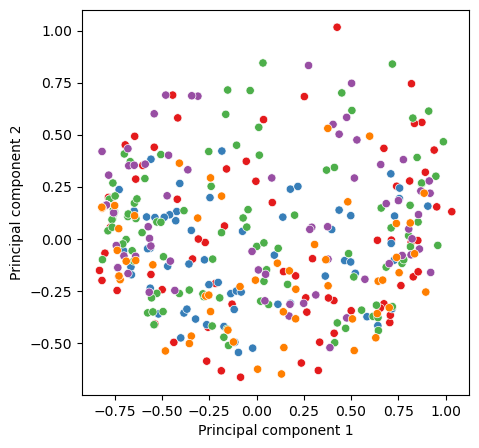

In [128]:
# Visualizar elementos
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
pca = PCA(2)
xpca = pca.fit_transform(X[idx_k,:])
plt.figure( figsize=(5,5))

sns.scatterplot(x=xpca[:,0], y=xpca[:,1], hue=y[idx_k], palette=sns.color_palette("Set1", len(set(y[idx_k]))), legend=False)
#for ck in classes_k:
#    idx = [i for i in range(len(y_train)) if y[idx_k[i]]==ck]
#    if len(idx) > 0:
#        Xk = X[idx, :]
#        xpca = pca.transform(Xk)
#        plt.scatter(xpca[:,0], xpca[:,1], label=str(ck))

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.savefig('pca_5_especies.pdf', bbox_inches='tight')
plt.show()

In [129]:
from sklearn.metrics import silhouette_score
print(silhouette_score(xpca, y[idx_k]))


-0.08069148007390282


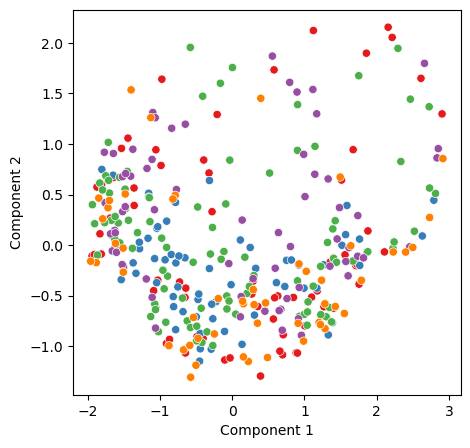

In [130]:
# Visualizar elementos
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

pca = Isomap(n_neighbors=5, n_components=2)
xpca = pca.fit_transform(X[idx_k,:])
plt.figure( figsize=(5,5))

sns.scatterplot(x=xpca[:,0], y=xpca[:,1], hue=y[idx_k], palette=sns.color_palette("Set1", len(set(y[idx_k]))), legend=False)
#for ck in classes_k:
#    idx = [i for i in range(len(y_train)) if y[idx_k[i]]==ck]
#    if len(idx) > 0:
#        Xk = X[idx, :]
#        xpca = pca.transform(Xk)
#        plt.scatter(xpca[:,0], xpca[:,1], label=str(ck))

plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.show()

c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


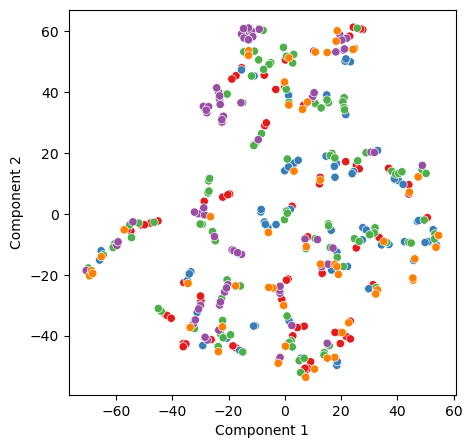

In [131]:
# Visualizar elementos
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
pca = TSNE(n_components=2, perplexity=5)
xpca = pca.fit_transform(X[idx_k,:])
plt.figure( figsize=(5,5))


sns.scatterplot(x=xpca[:,0], y=xpca[:,1], hue=y[idx_k], palette=sns.color_palette("Set1", len(set(y[idx_k]))), legend=False)

# for ck in classes_k:
    
#     idx = [i for i in range(len(y_train)) if y[idx_k[i]]==ck]
#     if len(idx) > 0:
#         Xk = X[idx, :]
#         xpca = pca.transform(Xk)
#         plt.scatter(xpca[:,0], xpca[:,1], label=str(ck))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('tsne_5_especies.pdf', bbox_inches='tight')
#plt.legend()
plt.show()

In [132]:
from sklearn.metrics import silhouette_score
print(silhouette_score(xpca, y[idx_k]))


-0.0710492


## Baseline: closed set

In [133]:
# Avaliar num KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          20       0.26      0.38      0.31        24
          28       0.50      0.43      0.47        23
          39       0.31      0.26      0.28        35
          73       0.43      0.60      0.50        20
          75       0.14      0.06      0.08        17

    accuracy                           0.34       119
   macro avg       0.33      0.35      0.33       119
weighted avg       0.33      0.34      0.33       119



In [134]:
# Avaliar num GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          20       0.44      0.17      0.24        24
          28       0.45      0.39      0.42        23
          39       0.47      0.26      0.33        35
          73       0.63      0.60      0.62        20
          75       0.19      0.59      0.29        17

    accuracy                           0.37       119
   macro avg       0.44      0.40      0.38       119
weighted avg       0.45      0.37      0.37       119



In [135]:
# Avaliar num SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf = SVC(C=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          20       0.40      0.50      0.44        24
          28       0.72      0.78      0.75        23
          39       0.50      0.43      0.46        35
          73       0.71      0.75      0.73        20
          75       0.62      0.47      0.53        17

    accuracy                           0.57       119
   macro avg       0.59      0.59      0.58       119
weighted avg       0.57      0.57      0.57       119



### Experimento: dataset crescendo

In [136]:
# Dividir o dataset em classes conhecidas e desconhecidas
# y tem meu set
import random
import numpy as np
from sklearn.metrics import balanced_accuracy_score, f1_score

classes = list(set(y))
random.shuffle(classes)
ac_knn=[]
ac_gnb=[]
ac_svc=[]
f1_knn=[]
f1_gnb=[]
f1_svc=[]
n_classes=[]

for p_unknown in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97]:
    #print(p_unknown, len(set(classes_k)))
    n_max = int(len(classes) * p_unknown)
    classes_unk = classes[0:n_max]
    classes_k = classes[n_max:]
    idx_unk = [i for i in range(len(y)) if y[i] in classes_unk]
    idx_k = [i for i in range(len(y)) if y[i] in classes_k]
    print(p_unknown, len(set(classes_k)))
    n_classes.append(len(set(classes_k)))

    X_train, X_test, y_train, y_test = train_test_split(X[idx_k,:], y[idx_k], test_size=0.33, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_knn = knn.predict(X_test)
    ac_knn.append (balanced_accuracy_score(y_test, y_knn, adjusted=True))
    f1_knn.append (f1_score(y_test, y_knn, average='macro'))

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_gnb = gnb.predict(X_test)
    ac_gnb.append (balanced_accuracy_score(y_test, y_gnb, adjusted=True))
    f1_gnb.append (f1_score(y_test, y_gnb, average='macro'))

    svc = SVC(C=100)
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    ac_svc.append(balanced_accuracy_score(y_test, y_svc, adjusted=True))
    f1_svc.append (f1_score(y_test, y_svc, average='macro'))

0 93
0.1 84
0.2 75
0.3 66
0.4 56
0.5 47
0.6 38
0.7 28
0.8 19
0.9 10
0.95 5
0.97 3


In [137]:
ac_knn_ = ac_knn
ac_gnb_ = ac_gnb
ac_svc_ = ac_svc

f1_knn_ = f1_knn
f1_gnb_ = f1_gnb
f1_svc_ = f1_svc

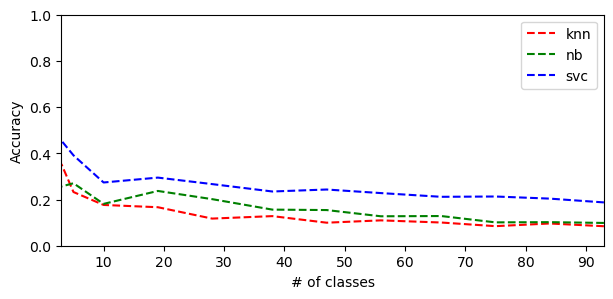

In [138]:
plt.figure(figsize=(7,3))
plt.plot(n_classes, ac_knn, 'r--', label='knn')
plt.plot(n_classes, ac_gnb, 'g--', label='nb')
plt.plot(n_classes, ac_svc, 'b--', label='svc')
plt.legend()
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.xlim([3,93])
plt.xlabel('# of classes')
plt.show()


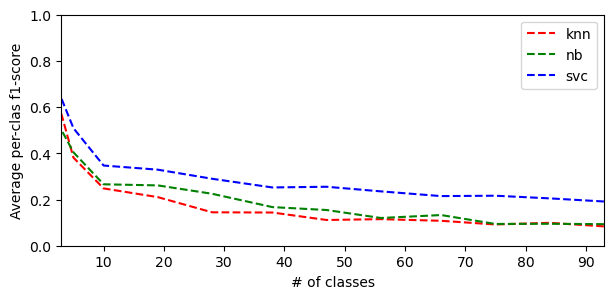

In [139]:
plt.figure(figsize=(7,3))
plt.plot(n_classes, f1_knn, 'r--', label='knn')
plt.plot(n_classes, f1_gnb, 'g--', label='nb')
plt.plot(n_classes, f1_svc, 'b--', label='svc')
plt.legend()
plt.ylabel('Average per-clas f1-score')
plt.ylim([0,1])
plt.xlim([3,93])
plt.xlabel('# of classes')
plt.show()


### Experimento: F1-Score por classe

In [140]:
# Dividir o dataset em classes conhecidas e desconhecidas
# y tem meu set
import random
import numpy as np
from sklearn.metrics import balanced_accuracy_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
_f1_knn = f1_score(y_test, y_knn, average=None)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
_f1_gnb = f1_score(y_test, y_gnb, average=None)

svc = SVC(C=100)
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)
_f1_svc = f1_score(y_test, y_svc, average=None)

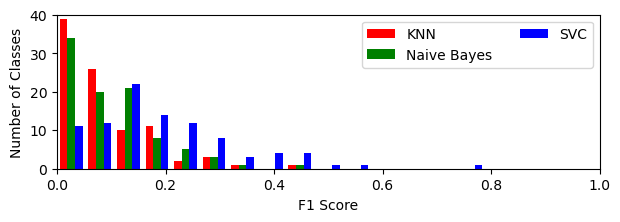

In [141]:
plt.figure(figsize=(7,2))
nbins = 20
# plt.subplot(1,3,1)
plt.hist((_f1_knn, _f1_gnb, _f1_svc), color=('r', 'g', 'b'), bins=np.linspace(0,1,nbins), label=('KNN', 'Naive Bayes', 'SVC') )
# plt.subplot(1,3,2)
# plt.hist(_f1_gnb, color='g', density=True, bins=np.linspace(0,1,nbins), alpha=0.5, label='Naive Bayes')
# plt.subplot(1,3,3)
# plt.hist(_f1_svc, color='b', density=True, bins=np.linspace(0,1,nbins), alpha=0.5, label='SVC')
plt.legend(ncol=2)
plt.ylim([0,40])
plt.xlim([0,1])

plt.ylabel('Number of Classes')
plt.xlabel('F1 Score')
plt.savefig('results_f1_closed_hist.pdf', bbox_inches='tight')
plt.show()

## Classificadores Open Set

### KNN com limiar

In [142]:
clf = KNeighborsClassifier(n_neighbors=5)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

clf.fit(X_train_, y_train_)

# Determinar limiar
y_thresh = np.min(clf.kneighbors(X_test_, return_distance=True)[0], axis=1)
thresh = np.percentile(y_thresh,95)
print(thresh)

# Predicao com limiar
y_pred = clf.predict(X_test)
y_prob = np.min(clf.kneighbors(X_test, return_distance=True)[0], axis=1)

y_pred[y_prob > thresh] = -1
print(classification_report(y_test,y_pred))

# Predicao dos desconhecidos
Xuk = X[idx_unk,:]
y_pred = clf.predict(Xuk)
y_prob_ = np.max(clf.kneighbors(Xuk, return_distance=True)[0], axis=1)
y_pred[y_prob_ > thresh] = -1
acc_uk = np.sum(y_pred==-1)/len(y_pred)
print(acc_uk)


0.4191069050081397


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.04      0.22      0.07        18
           1       0.09      0.21      0.12        38
           2       0.09      0.21      0.13        19
           3       0.14      0.37      0.20        43
           4       0.12      0.21      0.16        34
           5       0.10      0.22      0.14        27
           6       0.09      0.33      0.14        12
           7       0.02      0.06      0.03        18
           8       0.10      0.25      0.14        24
           9       0.02      0.05      0.03        21
          10       0.12      0.18      0.14        28
          11       0.00      0.00      0.00        24
          12       0.17      0.29      0.21        17
          13       0.02      0.05      0.03        20
          14       0.03      0.04      0.04        24
          15       0.06      0.09      0.07        23
          16       0.05    

### Naive Bayes com limiar

In [143]:
# Avaliar num GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(X_train, y_train)

# Determinar limiar
y_thresh = np.max(clf.predict_log_proba(X_train), axis=1)
thresh = np.percentile(y_thresh,30)
print(thresh)

# Predicao com limiar
y_pred = clf.predict(X_test)
y_prob = np.max(clf.predict_log_proba(X_test), axis=1)

y_pred[y_prob < thresh] = -1
print(classification_report(y_test,y_pred))

# Predicao dos desconhecidos
Xuk = X[idx_unk,:]
y_pred = clf.predict(Xuk)
y_prob_ = np.max(clf.predict_log_proba(Xuk), axis=1)
y_pred[y_prob_ < thresh] = -1
acc_uk = np.sum(y_pred==-1)/len(y_pred)
print(acc_uk)


-0.6176778987397114
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.29      0.11      0.16        18
           1       0.20      0.13      0.16        38
           2       0.04      0.16      0.06        19
           3       0.40      0.09      0.15        43
           4       0.50      0.06      0.11        34
           5       0.33      0.15      0.21        27
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        18
           8       0.50      0.08      0.14        24
           9       0.00      0.00      0.00        21
          10       0.17      0.11      0.13        28
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        17
          13       0.40      0.20      0.27        20
          14       0.15      0.08      0.11        24
          15       0.00      0.00      0.00        23
       

c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

0.2990890688259109


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  """
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


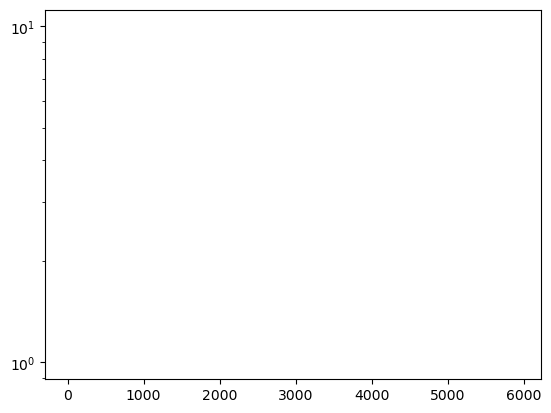

In [144]:
plt.figure()
plt.plot(y_thresh)
plt.plot(y_prob)
plt.plot(y_prob_)
plt.semilogy()
plt.show()

In [145]:
# Avaliar num SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Determinar limiar
y_thresh = np.max(clf.predict_proba(X_train), axis=1)
thresh = np.percentile(y_thresh,30)
print(thresh)

# Predicao com limiar
y_pred = clf.predict(X_test)
y_prob = np.max(clf.predict_proba(X_test), axis=1)

y_pred[y_prob < thresh] = -1
print(classification_report(y_test,y_pred))

# Predicao dos desconhecidos
Xuk = X[idx_unk,:]
y_pred = clf.predict(Xuk)
y_prob_ = np.max(clf.predict_proba(Xuk), axis=1)
y_pred[y_prob_ < thresh] = -1
acc_uk = np.sum(y_pred==-1)/len(y_pred)
print(acc_uk)


0.04121914640836416


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00        18
           1       0.04      0.03      0.03        38
           2       0.00      0.00      0.00        19
           3       0.25      0.44      0.32        43
           4       0.18      0.18      0.18        34
           5       0.33      0.04      0.07        27
           6       0.09      0.33      0.14        12
           7       0.00      0.00      0.00        18
           8       0.25      0.21      0.23        24
           9       0.02      0.05      0.03        21
          10       0.50      0.04      0.07        28
          11       0.00      0.00      0.00        24
          12       0.33      0.24      0.28        17
          13       0.11      0.20      0.14        20
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        23
          16       0.17    

### Experimento: open dataset crescendo

In [146]:
# Dividir o dataset em classes conhecidas e desconhecidas
# y tem meu set
import random
import numpy as np
from sklearn.metrics import balanced_accuracy_score

classes = list(set(y))
random.shuffle(classes)
ac_knn=[]
f1_knn=[]
uk_knn=[]
ac_gnb=[]
f1_gnb=[]
uk_gnb=[]
ac_svc=[]
f1_svc=[]
uk_svc=[]
n_classes=[]

for p_unknown in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97]:
    #print(p_unknown, len(set(classes_k)))
    n_max = int(len(classes) * p_unknown)
    classes_unk = classes[0:n_max]
    classes_k = classes[n_max:]
    idx_unk = [i for i in range(len(y)) if y[i] in classes_unk]
    idx_k = [i for i in range(len(y)) if y[i] in classes_k]
    print(p_unknown, len(set(classes_k)))
    n_classes.append(len(set(classes_k)))
    Xuk = X[idx_unk,:]
    X_train, X_test, y_train, y_test = train_test_split(X[idx_k,:], y[idx_k], test_size=0.33, random_state=42)

    clf = KNeighborsClassifier(n_neighbors=5)
    X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
    clf.fit(X_train_, y_train_)
    # Determinar limiar
    y_thresh = np.min(clf.kneighbors(X_val_, return_distance=True)[0], axis=1)
    thresh = np.percentile(y_thresh,90)
    y_pred = clf.predict(X_test)
    y_prob = np.min(clf.kneighbors(X_test, return_distance=True)[0], axis=1)
    y_pred[y_prob > thresh] = -1
    ac_knn.append (balanced_accuracy_score(y_test, y_pred, adjusted=True))
    f1_knn.append(f1_score(y_test, y_pred, average='macro'))
    # Predicao dos desconhecidos
    if len(idx_unk)>0:
        y_pred =clf.predict(Xuk)
        y_prob_ = np.min(clf.kneighbors(Xuk, return_distance=True)[0], axis=1)
        y_pred[y_prob_ > thresh] = -1
        uk_knn.append(np.sum(y_pred==-1)/len(y_pred))
    else:
        uk_knn.append(1)

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    # Determinar limiar
    y_thresh = np.max(clf.predict_proba(X_train), axis=1)
    thresh = np.percentile(y_thresh,10)
    y_pred = clf.predict(X_test)
    y_prob = np.max(clf.predict_proba(X_test), axis=1)
    y_pred[y_prob < thresh] = -1
    ac_gnb.append (balanced_accuracy_score(y_test, y_pred, adjusted=True))
    f1_gnb.append(f1_score(y_test, y_pred, average='macro'))
    # Predicao dos desconhecidos
    if len(idx_unk)>0:
        y_pred =clf.predict(Xuk)
        y_prob_ = np.max(clf.predict_proba(Xuk), axis=1)
        y_pred[y_prob_ < thresh] = -1
        uk_gnb.append(np.sum(y_pred==-1)/len(y_pred))
    else:
        uk_gnb.append(1)

    clf = SVC(C=100,probability=True)
    clf.fit(X_train, y_train)
    # Determinar limiar
    y_thresh = np.max(clf.predict_proba(X_train), axis=1)
    thresh = np.percentile(y_thresh,10)
    y_pred = clf.predict(X_test)
    y_prob = np.max(clf.predict_proba(X_test), axis=1)
    y_pred[y_prob < thresh] = -1
    ac_svc.append (balanced_accuracy_score(y_test, y_pred, adjusted=True))
    f1_svc.append(f1_score(y_test, y_pred, average='macro'))
    # Predicao dos desconhecidos
    if len(idx_unk)>0:
        y_pred =clf.predict(Xuk)
        y_prob_ = np.max(clf.predict_proba(Xuk), axis=1)
        y_pred[y_prob_ < thresh] = -1
        uk_svc.append(np.sum(y_pred==-1)/len(y_pred))
    else:
        uk_svc.append(1)

0 93


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.1 84


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.2 75


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.3 66


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.4 56


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.5 47


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.6 38


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.7 28


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.8 19


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.9 10


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.95 5


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.97 3


c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\tiago\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


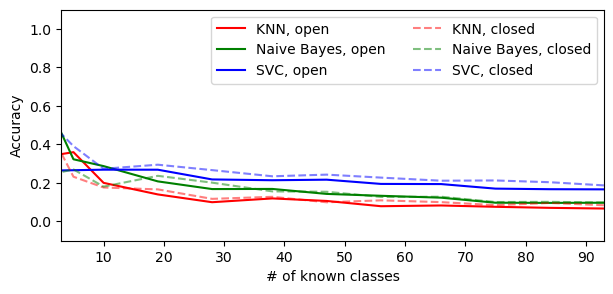

In [147]:
plt.figure(figsize=(7,3))
plt.plot(n_classes, ac_knn, 'r', alpha=1, label='KNN, open')
plt.plot(n_classes, ac_gnb, 'g', alpha=1, label='Naive Bayes, open')
plt.plot(n_classes, ac_svc, 'b', alpha=1, label='SVC, open')
#plt.plot(n_classes[1:], uk_knn[1:], 'r:', label='knn, unknown')
#plt.plot(n_classes[1:], uk_gnb[1:], 'g:', label='nb, unknown')
#plt.plot(n_classes[1:], uk_svc[1:], 'b:', label='svc, unknown')
plt.plot(n_classes, ac_knn_, 'r--', alpha=0.5, label='KNN, closed')
plt.plot(n_classes, ac_gnb_, 'g--', alpha=0.5, label='Naive Bayes, closed')
plt.plot(n_classes, ac_svc_, 'b--', alpha=0.5, label='SVC, closed')
plt.legend(ncol=2)
plt.ylim([-0.1,1.1])
plt.xlim([3,93])

plt.ylabel('Accuracy')
plt.xlabel('# of known classes')
plt.savefig('results_classes.pdf', bbox_inches='tight')
plt.show()

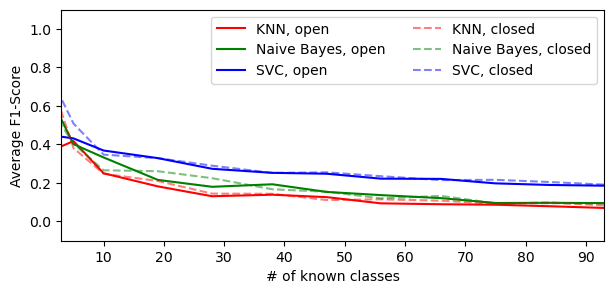

In [148]:
plt.figure(figsize=(7,3))
plt.plot(n_classes, f1_knn, 'r', alpha=1, label='KNN, open')
plt.plot(n_classes, f1_gnb, 'g', alpha=1, label='Naive Bayes, open')
plt.plot(n_classes, f1_svc, 'b', alpha=1, label='SVC, open')
#plt.plot(n_classes[1:], uk_knn[1:], 'r:', label='knn, unknown')
#plt.plot(n_classes[1:], uk_gnb[1:], 'g:', label='nb, unknown')
#plt.plot(n_classes[1:], uk_svc[1:], 'b:', label='svc, unknown')
plt.plot(n_classes, f1_knn_, 'r--', alpha=0.5, label='KNN, closed')
plt.plot(n_classes, f1_gnb_, 'g--', alpha=0.5, label='Naive Bayes, closed')
plt.plot(n_classes, f1_svc_, 'b--', alpha=0.5, label='SVC, closed')
plt.legend(ncol=2)
plt.ylim([-0.1,1.1])
plt.xlim([3,93])

plt.ylabel('Average F1-Score')
plt.xlabel('# of known classes')
plt.savefig('results_classes_f1.pdf', bbox_inches='tight')
plt.show()

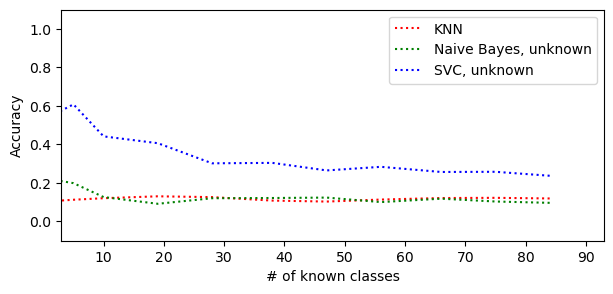

In [149]:
plt.figure(figsize=(7,3))
#plt.plot(n_classes, ac_knn, 'r', alpha=1, label='KNN, open')
#plt.plot(n_classes, ac_gnb, 'g', alpha=1, label='Naive Bayes, open')
#plt.plot(n_classes, ac_svc, 'b', alpha=1, label='SVC, open')
plt.plot(n_classes[1:], uk_knn[1:], 'r:', label='KNN')
plt.plot(n_classes[1:], uk_gnb[1:], 'g:', label='Naive Bayes, unknown')
plt.plot(n_classes[1:], uk_svc[1:], 'b:', label='SVC, unknown')
#plt.plot(n_classes, ac_knn_, 'r--', alpha=0.5, label='KNN, closed')
#plt.plot(n_classes, ac_gnb_, 'g--', alpha=0.5, label='Naive Bayes, closed')
#plt.plot(n_classes, ac_svc_, 'b--', alpha=0.5, label='SVC, closed')
plt.legend(ncol=1)
plt.ylim([-0.1,1.1])
plt.xlim([3,93])

plt.ylabel('Accuracy')
plt.xlabel('# of known classes')
plt.savefig('results_unknown.pdf', bbox_inches='tight')
plt.show()

### One Class SVM

In [150]:
# Treinar classificadores one-class
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform

classificadores = []
for ck in classes_k:
    print(ck, len([c for c in y_train if c==ck]))
    idx = [i for i in range(len(y_train)) if y_train[i]==ck]
    if len(idx) > 0:
        Xk = X[idx, :]
        yk = y[idx]
        #print(len(Xk), Xk.shape)
        nu_ = 0.9
        training = True
        while training is True:
            if nu_ < 10**-3:
                break
            classificador = OneClassSVM(nu=nu_, kernel='rbf', gamma='scale')
            Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk, test_size=0.33, random_state=42)
            classificador.fit(Xk_train)
            yk_pred = classificador.predict(Xk_test)
            measure = np.sum(yk_pred==-1)/len(yk_pred)
            if measure > 0.3:
                nu_ = nu_/2
            else:
                training = False

        
        print(ck, nu_, measure)
        classificadores.append(classificador)
    
print(len(classificadores))

73 52
73 0.00087890625 0.5
41 30
41 0.00087890625 0.6
4 67
4 0.225 0.17391304347826086
3


In [151]:
# Avaliar classificadores
def predict_sample(classificadores, sample):
    s_ = sample.reshape(1,-1)
    scores = []
    found = False
    for c in classificadores:
        if c.predict(s_)==-1:
            score = -1
        else:
            score = c.score_samples(s_)[0]
            found = True
        scores.append(score)

    scores = np.array(scores)
    #print(scores)
    if found == False:
        return -1
    else:
        return classes_k[np.argmax(scores)]

In [152]:
#for i in range(X_train.shape[0]):
#    y_ = predict_sample(classificadores, X_train[i,:])
#    print(y_, y_train[i])

In [153]:
print(len(set(y_test)))
print(len(classificadores))

3
3


In [154]:
# Evaluation with known labels:

hits = 0
misses = 0
give_ups = 0
y_pred = []
print(X_test.shape[0])
for i in range(X_test.shape[0]):
    y_ = predict_sample(classificadores, X_test[i,:])
    if y_ == -1:
        give_ups += 1
    else:
        if y_ == y_test[i]:
            hits += 1
        else:
            misses += 1
    y_pred.append(y_)
print(hits, misses, give_ups)

74
12 39 23


In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels=classes_k))

              precision    recall  f1-score   support

          73       0.36      0.18      0.24        22
          41       0.00      0.00      0.00        22
           4       0.22      0.27      0.24        30

   micro avg       0.24      0.16      0.19        74
   macro avg       0.19      0.15      0.16        74
weighted avg       0.20      0.16      0.17        74



In [156]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 0  0  0  0]
 [15  8  2  5]
 [ 5 15  0  2]
 [ 3 14  1  4]]


In [157]:
# Evaluation with unknown labels:
X_unk = X[idx_unk,:]
wrong_guesses = 0
correct_unknown = 0

for i in range(X_unk.shape[0]):
    y_ = predict_sample(classificadores, X_unk[i,:])
    if y_ == -1:
        correct_unknown += 1
    else:
        wrong_guesses += 1

print(correct_unknown, wrong_guesses)

1630 4260
